### 3.4.1 学習コードの実装

In [1]:
include("../common/trainer.jl")
include("../common/optimizer.jl")
include("./simple_cbow.jl")
include("../common/util.jl")

convert_one_hot (generic function with 1 method)

In [2]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

1000

In [3]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

([1, 2, 3, 4, 5, 2, 6, 7], Dict{Any,Any}("say" => 2,"goodbye" => 3,"you" => 1,"hello" => 6,"." => 7,"and" => 4,"i" => 5), Dict{Any,Any}(7 => ".",4 => "and",2 => "say",3 => "goodbye",5 => "i",6 => "hello",1 => "you"))

In [4]:
vocab_size = length(word_to_id)
contexts, target = create_context_target(corpus, window_size=1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

6×2×7 Array{Int32,3}:
[:, :, 1] =
 1  0
 0  0
 0  0
 0  0
 0  0
 0  0

[:, :, 2] =
 0  0
 1  0
 0  0
 0  1
 0  0
 1  0

[:, :, 3] =
 0  1
 0  0
 1  0
 0  0
 0  0
 0  0

[:, :, 4] =
 0  0
 0  1
 0  0
 1  0
 0  0
 0  0

[:, :, 5] =
 0  0
 0  0
 0  1
 0  0
 1  0
 0  0

[:, :, 6] =
 0  0
 0  0
 0  0
 0  0
 0  1
 0  0

[:, :, 7] =
 0  0
 0  0
 0  0
 0  0
 0  0
 0  1

In [5]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

Trainer(SimpleCBOW(MatMul([[-0.006705316853493732 0.005164752986673071 … 0.00827543142999334 0.009311445987968535; 0.005003448392347791 0.0007327698801701584 … -0.014916365686096068 0.0014400698512969426; … ; -0.006115938764350723 -0.01551144022123978 … 0.008861522317821358 0.012304770019025642; 0.013452032564446319 0.006030699678169571 … 0.015148468756004728 0.0045344624958712]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[-0.006705316853493732 0.005164752986673071 … 0.00827543142999334 0.009311445987968535; 0.005003448392347791 0.0007327698801701584 … -0.014916365686096068 0.0014400698512969426; … ; -0.006115938764350723 -0.01551144022123978 … 0.008861522317821358 0.012304770019025642; 0.013452032564446319 0.006030699678169571 … 0.015148468756004728 0.0045344624958712]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[-0.0043487177209159894 -0.007174770287101029 … -0.005590

In [6]:
fit!(trainer, contexts, target, max_epoch=max_epoch, batch_size=batch_size)

| epoch 0 | iter 1 / 2 | loss 5.84
| epoch 0 | iter 2 / 2 | loss 5.84
| epoch 10 | iter 2 / 2 | loss 5.84
| epoch 20 | iter 1 / 2 | loss 5.83
| epoch 20 | iter 2 / 2 | loss 5.83
| epoch 30 | iter 2 / 2 | loss 5.81
| epoch 40 | iter 1 / 2 | loss 5.79
| epoch 40 | iter 2 / 2 | loss 5.79
| epoch 50 | iter 2 / 2 | loss 5.75
| epoch 60 | iter 1 / 2 | loss 5.71
| epoch 60 | iter 2 / 2 | loss 5.72
| epoch 70 | iter 2 / 2 | loss 5.63
| epoch 80 | iter 1 / 2 | loss 5.57
| epoch 80 | iter 2 / 2 | loss 5.49
| epoch 90 | iter 2 / 2 | loss 5.48
| epoch 100 | iter 1 / 2 | loss 5.33
| epoch 100 | iter 2 / 2 | loss 5.3
| epoch 110 | iter 2 / 2 | loss 5.23
| epoch 120 | iter 1 / 2 | loss 5.12
| epoch 120 | iter 2 / 2 | loss 5.08
| epoch 130 | iter 2 / 2 | loss 5.04
| epoch 140 | iter 1 / 2 | loss 4.83
| epoch 140 | iter 2 / 2 | loss 4.58
| epoch 150 | iter 2 / 2 | loss 4.74
| epoch 160 | iter 1 / 2 | loss 4.64
| epoch 160 | iter 2 / 2 | loss 4.71
| epoch 170 | iter 2 / 2 | loss 4.52
| epoch 180 | iter 

In [7]:
using Plots
gr()

Plots.GRBackend()

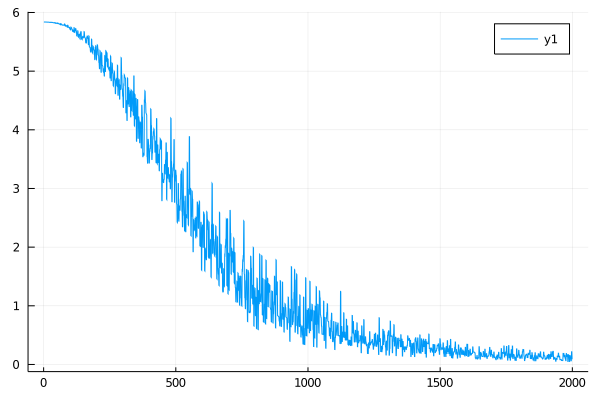

In [8]:
plot(trainer.loss_list)

#### MatMulレイヤの重みを表示

In [9]:
for (word_id, word) = id_to_word
    println("$(word) $(model.word_vecs[word_id, :])")
end

. [0.013452032564446319, 0.006030699678169571, -0.011665743764073574, 0.015148468756004728, 0.0045344624958712]
and [-0.015001180364381124, -0.014338033024762673, -0.013664734081862234, -0.011478835145459809, 0.006844865744179934]
say [0.005003448392347791, 0.0007327698801701584, 0.006949221694723336, -0.014916365686096068, 0.0014400698512969426]
goodbye [-0.000762688150841329, 0.01503794425567112, 0.002000403636222007, -0.0132796389065067, -0.005564180678718044]
i [0.014828540224471408, 0.016030435975508565, 0.001157100563594278, 0.0036455046609790306, 0.01617169568797759]
hello [-0.006115938764350723, -0.01551144022123978, 0.011542187546628993, 0.008861522317821358, 0.012304770019025642]
you [-0.006705316853493732, 0.005164752986673071, -0.01971953043565777, 0.00827543142999334, 0.009311445987968535]
